<a href="https://colab.research.google.com/github/richa-jainer/Portfoilo_optimization_usingPython/blob/main/Portfolio_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This program attempts to optimize a user portfolio using the Efficient Frontier

In [8]:
#Import the python libraries
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [9]:
#Get the stock symbols/tickers in the portfolio
#FAANG
assets = ['META','AMZN','AAPL','NFLX','GOOGL']

In [10]:
#Assign weights to our stocks
weights = np.array([0.2,0.2,0.2,0.2,0.2])

In [11]:
#Get the stock/portfolio starting date
stockStartDate = '2015-01-01'

In [12]:
#Get the stocks ending date (today)
today = datetime.today().strftime('%Y-%m-%d')
today

'2023-09-21'

In [15]:
#Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

#Store the adjusted close price of the stock into the df
for stock in assets:
    try:
        df[stock] = pdr.DataReader(stock, start= stockStartDate, end=today)['Adj Close']
    except Exception as e:
        print(f"Error retrieving data for {stock}: {e}")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [16]:
#Show the dataframe
df

,META,AMZN,AAPL,NFLX,GOOGL
Date,,,,,
2015-01-02,78.449997,15.426000,24.498686,49.848572,26.477501
2015-01-05,77.190002,15.109500,23.808517,47.311428,25.973000
2015-01-06,76.150002,14.764500,23.810760,46.501431,25.332001
2015-01-07,76.150002,14.921000,24.144636,46.742859,25.257500
2015-01-08,78.180000,15.023000,25.072329,47.779999,25.345501
...,...,...,...,...,...
2023-09-14,311.720001,144.720001,175.740005,400.489990,138.100006
2023-09-15,300.309998,140.389999,175.009995,396.940002,137.399994
2023-09-18,302.549988,139.979996,177.970001,394.399994,138.210007


<function matplotlib.pyplot.show(close=None, block=None)>

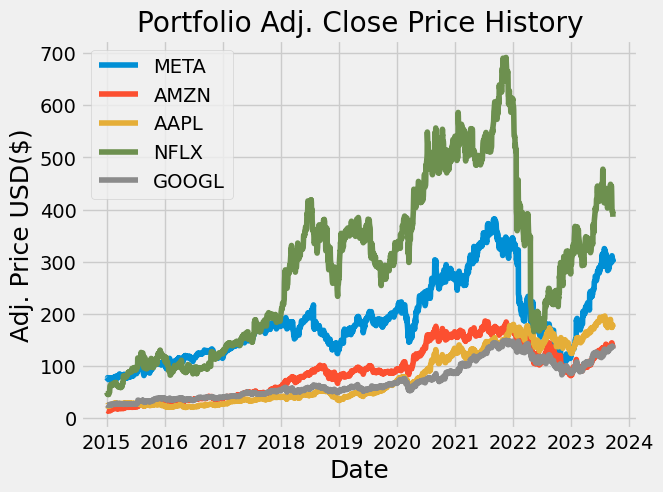

In [17]:
#Visually show the stock/portfolio
title = 'Portfolio Adj. Close Price History'

#Get the stocks
my_stocks = df

#create and plot the graph
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c],label = c)

plt.title(title)
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Adj. Price USD($)',fontsize = 18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show

In [18]:
#show the daily simple returns
returns = df.pct_change()
returns

,META,AMZN,AAPL,NFLX,GOOGL
Date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.016061,-0.020517,-0.028172,-0.050897,-0.019054
2015-01-06,-0.013473,-0.022833,0.000094,-0.017121,-0.024679
2015-01-07,0.000000,0.010600,0.014022,0.005192,-0.002941
2015-01-08,0.026658,0.006836,0.038422,0.022188,0.003484
...,...,...,...,...,...
2023-09-14,0.021832,-0.000898,0.008782,-0.028503,0.010168
2023-09-15,-0.036603,-0.029920,-0.004154,-0.008864,-0.005069
2023-09-18,0.007459,-0.002920,0.016913,-0.006399,0.005895


In [19]:
#create and show the annualized covariance matrix
cov_matrix_annual = returns.cov()*252
cov_matrix_annual

,META,AMZN,AAPL,NFLX,GOOGL
META,0.143706,0.074673,0.061427,0.080330,0.070701
AMZN,0.074673,0.111298,0.055756,0.079555,0.062299
AAPL,0.061427,0.055756,0.086225,0.056904,0.052552
NFLX,0.080330,0.079555,0.056904,0.203554,0.060557
GOOGL,0.070701,0.062299,0.052552,0.060557,0.081339


In [20]:
#Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual,weights))
port_variance

0.07742501757870246

In [21]:
#calculate the portfolio volalitility aka standard deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.2782535131470984

In [22]:
#Calculate the annual portfolio return
portfoiloSimpleAnnualReturn = np.sum(returns.mean()*weights)*252
portfoiloSimpleAnnualReturn

0.2733978174097616

In [23]:
#Show the expected annual return, volatility(risk), and variance
percent_var = str(round(port_variance,2)*100)+'%'
percent_vols = str(round(port_volatility,2)*100)+'%'
percent_ret = str(round(portfoiloSimpleAnnualReturn,2)*100)+'%'

print('Expected annual return: '+percent_ret)
print('Annual volatility/risk: '+percent_vols)
print('Annual Variance: '+percent_var)

Expected annual return: 27.0%
Annual volatility/risk: 28.000000000000004%
Annual Variance: 8.0%


In [24]:
pip install PyPortfolioOpt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.8 MB/s eta 0:00:00


In [27]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [28]:
#Portfolio Optimization:

#Calculate the expected returns and the annualised sample covariance matrix of assets returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

#optimize for max sharpe ratio
ef = EfficientFrontier(mu,S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('META', 0.0), ('AMZN', 0.423), ('AAPL', 0.51826), ('NFLX', 0.05874), ('GOOGL', 0.0)])
Expected annual return: 26.7%
Annual volatility: 27.5%
Sharpe Ratio: 0.90


(0.2670456709630371, 0.27502739914510915, 0.8982583980030717)

In [29]:
#Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation , get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 15000)

allocation , leftover = da.lp_portfolio()
print('Discrete Allocation: ', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete Allocation:  {'AMZN': 47, 'AAPL': 44, 'NFLX': 2}
Funds remaining: $147.21
